In [5]:
! pip install scikit-learn

Defaulting to user installation because normal site-packages is not writeable


In [1]:
import tensorflow as tf
print(tf.__version__)

/Library/Python/3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


2.15.0


In [2]:
from __future__ import absolute_import, division, print_function, unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from IPython.display import clear_output
from six.moves import urllib

import tensorflow as tf 
import tensorflow.feature_column as fc  


# Dados
Se você ainda não percebeu, a maior parte do aprendizado de máquina é baseada em dados! Na verdade, é tão importante que a maior parte do que faremos neste tutorial se concentrará em explorar, limpar e selecionar os dados apropriados.

O conjunto de dados no qual nos concentraremos aqui é o conjunto de dados do Titanic. Ele contém toneladas de informações sobre cada passageiro do navio. Nosso primeiro passo é sempre entender e explorar os dados. Então vamos fazer isso!

Abaixo, carregaremos um conjunto de dados e aprenderemos como explorá-lo usando algumas ferramentas integradas.

In [3]:
dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv') # Carrega os dados de treinamento do Titanic
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv') # Carrega os dados de avaliação do Titanic

print(dftrain.head()) # Exibe as primeiras linhas do DataFrame de treinamento

y_train  = dftrain.pop('survived') # Remove a coluna 'survived' dos dados de treinamento e a atribui a 'y_train'
Y_eval = dfeval.pop('survived') # Remove a coluna 'survived' dos dados de avaliação e a atribui a 'Y_eval'

dftrain.head() # Exibe as primeiras linhas do DataFrame de treinamento após a remoção da coluna 'survived'


   survived     sex   age  n_siblings_spouses  parch     fare  class     deck  \
0         0    male  22.0                   1      0   7.2500  Third  unknown   
1         1  female  38.0                   1      0  71.2833  First        C   
2         1  female  26.0                   0      0   7.9250  Third  unknown   
3         1  female  35.0                   1      0  53.1000  First        C   
4         0    male  28.0                   0      0   8.4583  Third  unknown   

   embark_town alone  
0  Southampton     n  
1    Cherbourg     n  
2  Southampton     y  
3  Southampton     n  
4   Queenstown     y  


,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y



O método `pd.read_csv()` nos retorna um novo dataframe do Pandas. Você pode pensar em um dataframe como uma tabela. Na verdade, podemos até dar uma olhada na representação da tabela.

Decidimos extrair a coluna "sobreviveu" do nosso conjunto de dados e armazená-la em uma nova variável. Esta coluna simplesmente nos diz se a pessoa sobreviveu ou não.

Para visualizar os dados, usaremos o método `.head()` do Pandas. Isso nos mostrará os primeiros 5 itens do nosso dataframe.

In [4]:
# Retorna estatísticas descritivas do DataFrame 'dftrain', como contagem, média, desvio padrão, mínimo, quartis e máximo para cada coluna numérica
dftrain.describe() 


,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200



# Treinamento versus Dados de Teste
Você pode ter notado que carregamos dois conjuntos de dados diferentes acima. Isso ocorre porque, ao treinar modelos, precisamos de dois conjuntos de dados: **treinamento e teste.**

Os dados de **treinamento** são aqueles que alimentamos ao modelo para que ele possa se desenvolver e aprender. Geralmente, é um tamanho muito maior do que os dados de teste.

Os dados de **teste** são aqueles que usamos para avaliar o modelo e ver como ele está se saindo. Devemos usar um conjunto separado de dados nos quais o modelo não foi treinado para avaliá-lo. Você consegue pensar por que isso é necessário?

Bem, o objetivo do nosso modelo é ser capaz de fazer previsões em NOVOS dados, dados que nunca vimos antes. Se simplesmente testarmos o modelo nos dados que ele já viu, não podemos medir sua precisão de forma precisa. Não podemos ter certeza de que o modelo não apenas memorizou nossos dados de treinamento. É por isso que precisamos que nossos dados de teste e treinamento sejam separados.

In [5]:
dftrain.shape #tamanho da tabela(627 linhas e 9 colunas)

(627, 9)

<Axes: >

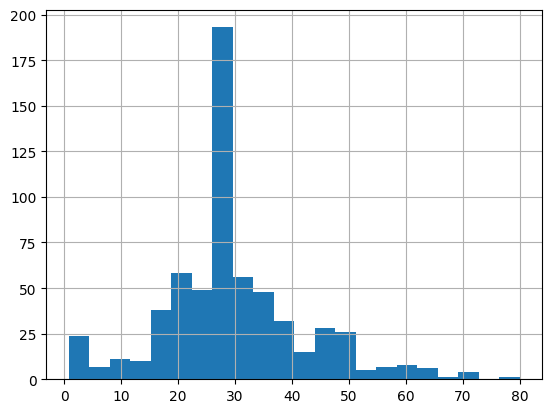

In [6]:
# Cria um histograma da coluna 'age' do DataFrame 'dftrain' com 22 bins (intervalos) para visualizar a distribuição das idades
dftrain.age.hist(bins=22) 


 Utiliza o método 'plot' para criar um gráfico a partir dos dados fornecidos. O parâmetro 'kind="barh"' especifica o tipo de gráfico desejado, neste caso, um gráfico de barras horizontais (barh), que é uma forma eficaz de visualizar a contagem de cada categoria da variável categórica 'sex'.

Cria um gráfico de barras horizontais que representa a contagem de cada categoria 
na coluna 'sex' do DataFrame 'dftrain', ou seja, quantas vezes cada sexo (masculino ou feminino) aparece nos dados de treinamento.



 

<Axes: ylabel='sex'>

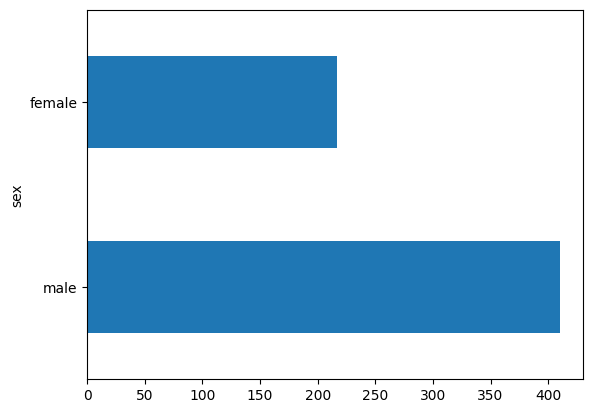

In [8]:
dftrain.sex.value_counts().plot(kind="barh") 


<Axes: ylabel='class'>

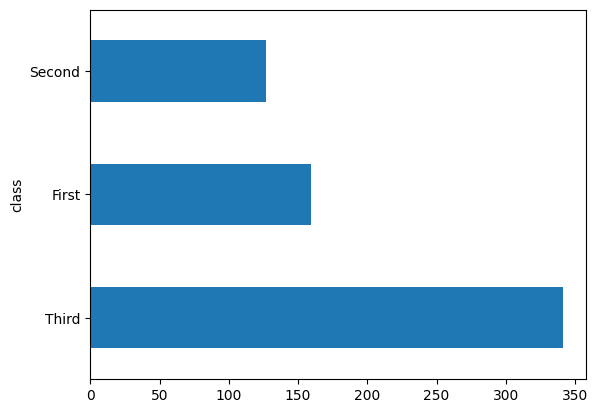

In [9]:
dftrain["class"].value_counts().plot(kind="barh")

Combina os dados de treinamento e a variável alvo 'survived', agrupa pelo sexo ('sex'), calcula a média de sobrevivência para cada sexo e plota um gráfico de barras horizontais com as médias de sobrevivência. Em seguida, define o rótulo do eixo x como '% survive' para indicar que as barras representam a porcentagem de sobrevivência.

Text(0.5, 0, '% survive')

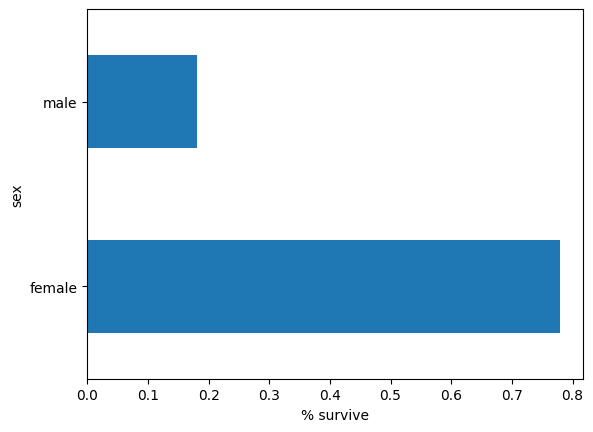

In [10]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survive')

Este código cria colunas de características para uso em modelos de aprendizado de máquina, especificamente em um contexto de classificação. Ele começa definindo duas listas: 'CATEGORICAL_COLUMNS', que contém o nome das colunas categóricas no conjunto de dados, e 'NUMERIC_COLUMNS', que contém o nome das colunas numéricas.

Em seguida, ele inicializa uma lista vazia chamada 'feature_columns' para armazenar as colunas de características. 

O primeiro loop percorre as colunas categóricas. Para cada coluna categórica, ele extrai os valores únicos dessa coluna e os armazena em 'vocabulary'. Em seguida, ele usa esses valores únicos para criar uma coluna de características categóricas usando 'tf.feature_column.categorical_column_with_vocabulary_list' e a adiciona à lista 'feature_columns'.

O segundo loop percorre as colunas numéricas. Para cada coluna numérica, ele cria uma coluna de características numéricas usando 'tf.feature_column.numeric_column' e a adiciona à lista 'feature_columns'.

Finalmente, ele imprime a lista 'feature_columns', que contém todas as colunas de características criadas, incluindo as colunas categóricas e numéricas. Essas colunas de características serão utilizadas posteriormente na construção do modelo de aprendizado de máquina.


In [11]:
CATEGORICAL_COLUMNS = ['sex', 'n_siblings_spouses', 'parch', 'class', 'deck', 'embark_town', 'alone'] # Lista das colunas categóricas do conjunto de dados
NUMERIC_COLUMNS = ['age', 'fare'] # Lista das colunas numéricas do conjunto de dados

feature_columns = [] # Lista para armazenar as colunas de características para uso posterior na construção do modelo

# Loop para processar as colunas categóricas
for feature_name in CATEGORICAL_COLUMNS:
    vocabulary = dftrain[feature_name].unique() # Obtém uma lista de todos os valores únicos da coluna de características fornecida
    feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary)) # Cria uma coluna de características categóricas usando os valores únicos como vocabulário e a adiciona à lista de colunas de características

# Loop para processar as colunas numéricas
for feature_name in NUMERIC_COLUMNS:
    feature_columns.append(tf.feature_column.numeric_column(feature_name, dtype=tf.float32))# Cria uma coluna de características numéricas e a adiciona à lista de colunas de características, especificando o tipo de dados como float32

print(feature_columns) # Exibe a lista de todas as colunas de características criadas, que serão utilizadas posteriormente na construção do modelo


Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
Instructions for updating:
Use Keras preprocessing layers instead, either directly or via the `tf.keras.utils.FeatureSpace` utility. Each of `tf.feature_column.*` has a functional equivalent in `tf.keras.layers` for feature preprocessing when training a Keras model.
[VocabularyListCategoricalColumn(key='sex', vocabulary_list=('male', 'female'), dtype=tf.string, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='n_siblings_spouses', vocabulary_list=(1, 0, 3, 4, 2, 5, 8), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='parch', vocabulary_list=(0, 1, 2, 5, 3, 4), dtype=tf.int64, default_value=-1, num_oov_buckets=0), VocabularyListCategoricalColumn(key='class', 

In [12]:
dftrain['embark_town'].unique() #testando o .unique

array(['Southampton', 'Cherbourg', 'Queenstown', 'unknown'], dtype=object)

Esta função `make_input_fn` cria uma função de entrada (input function) para ser usada em um modelo de aprendizado de máquina. Ela recebe um DataFrame `data_df` contendo os dados de características e uma Series `label_df` contendo os rótulos correspondentes. 

Internamente, a função cria um dataset TensorFlow (`tf.data.Dataset`) a partir dos dados e rótulos fornecidos. Os dados são convertidos em um dicionário, onde as chaves são os nomes das características e os valores são os dados correspondentes. Isso é feito utilizando `tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))`.

Depois, a função embaralha os dados se o argumento `shuffle` for verdadeiro e os agrupa em lotes de tamanho `batch_size`. Se o parâmetro `shuffle` for verdadeiro, o dataset é embaralhado antes de ser agrupado. O parâmetro `num_epochs` define o número de épocas de treinamento.

A função retorna outra função que, quando chamada, retorna o dataset preparado para treinamento ou avaliação.

O objeto `linear_est` é um estimador TensorFlow que utiliza um modelo de regressão linear. É configurado com as colunas de características `feature_columns` previamente definidas. 

Em seguida, o modelo é treinado usando os dados de treinamento (`train_input_fn`) e avaliado usando os dados de avaliação (`eval_input_fn`). 

Finalmente, as métricas do modelo, como precisão, são impressas na tela.


In [13]:
def make_input_fn(data_df, label_df, num_epochs=10, shuffle=True, batch_size=32):
    def input_function():
        ds = tf.data.Dataset.from_tensor_slices((dict(data_df), label_df))
        if shuffle:
            ds = ds.shuffle(10000)
        ds = ds.batch(batch_size).repeat(num_epochs)
        return ds
    return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval, Y_eval, num_epochs=1, shuffle=False)

linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)

linear_est.train(train_input_fn) # Treina o modelo
result = linear_est.evaluate(eval_input_fn) # Obtém métricas/estatísticas do modelo ao testá-lo nos dados de avaliação

clear_output() # Limpa a saída do console
print(result['accuracy']) # A variável 'result' é um dicionário de estatísticas sobre nosso modelo; aqui, estamos imprimindo a precisão do modelo


0.75


Neste trecho de código, o modelo linear (`linear_est`) faz previsões para os dados de avaliação utilizando a função de entrada (`eval_input_fn`) que criamos anteriormente. 

A função `linear_est.predict(eval_input_fn)` retorna um iterável de previsões para cada exemplo nos dados de avaliação. Utilizamos `list()` para converter esse iterável em uma lista chamada `result`.

Em seguida, imprimimos as características do exemplo na linha 3 do DataFrame de avaliação (`dfeval`) usando `print(dfeval.loc[3])`.

Por fim, imprimimos a probabilidade prevista de que o exemplo na linha 3 pertença à classe negativa (primeira classe) usando `print(result[3]['probabilities'][0])`. Isso é feito acessando as probabilidades previstas para o exemplo na posição 3 da lista `result` e selecionando a probabilidade associada à classe negativa.


In [14]:
result = list(linear_est.predict(eval_input_fn)) # Obtém uma lista de previsões do modelo linear para os dados de avaliação
print(dfeval.loc[3]) # Imprime as características do exemplo de avaliação na linha 3 do DataFrame dfeval
print(result[3]['probabilities'][0]) # Imprime a probabilidade prevista de que o exemplo na linha 3 do DataFrame dfeval pertença à classe negativa (primeira classe)


INFO:tensorflow:Calling model_fn.


Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/9r/7yls0v3x7dn8j9zhfncqkj800000gp/T/tmpwb5jw7jq/model.ckpt-200
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
sex                        female
age                          55.0
n_siblings_spouses              0
parch                           0
fare                         16.0
class                      Second
deck                      unknown
embark_town           Southampton
alone                           y
Name: 3, dtype: object
0.13740592



# Classificação
Agora que abordamos a regressão linear, é hora de falar sobre classificação. Enquanto a regressão era usada para prever um valor numérico, a classificação é usada para separar pontos de dados em classes com diferentes rótulos. Neste exemplo, usaremos um estimador TensorFlow para classificar flores.

Como já falamos sobre como os estimadores funcionam anteriormente, abordarei este exemplo de forma mais rápida.

Esta seção é baseada no seguinte guia do site TensorFlow: https://www.tensorflow.org/tutorials/estimator/premade

### Conjunto de Dados
Este conjunto de dados específico separa flores em 3 classes diferentes de espécies:

<li>Setosa</li> 
<li>Versicolor</li> 
<li>Virginica</li> 

As informações sobre cada flor são as seguintes:

<li>Comprimento da sépala</li> 
<li>Largura da sépala</li> 
<li>Comprimento da pétala</li> 
<li>Largura da pétala</li> 

In [15]:
CSV_COLUMNS_NAMES = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Species']
SPECIES =  ['Setosa', 'Versicolor', 'Virginica']

# vamos definir algumas constantes para nos ajudar depois

In [16]:
train_path = tf.keras.utils.get_file(
    "iris_training.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_training.csv")
test_path = tf.keras.utils.get_file(
    "iris_test.csv", "https://storage.googleapis.com/download.tensorflow.org/data/iris_test.csv")

train = pd.read_csv(train_path, names=CSV_COLUMNS_NAMES, header=0)
test = pd.read_csv(test_path, names=CSV_COLUMNS_NAMES, header=0)
# aqui estamos usando o keras (um módulo dentro do tensorflow) para pegar nossos datasets e ler eles em um dataframe pandas

Agora vamos checar nosso conjunto de dados

In [17]:
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth,Species
0,6.4,2.8,5.6,2.2,2
1,5.0,2.3,3.3,1.0,1
2,4.9,2.5,4.5,1.7,2
3,4.9,3.1,1.5,0.1,0
4,5.7,3.8,1.7,0.3,0


Agora nós podemos remover a coluna espécies e usa-la como nosso label


In [18]:
train_y = train.pop('Species')
test_y = test.pop('Species')
train.head()

,SepalLength,SepalWidth,PetalLength,PetalWidth
0,6.4,2.8,5.6,2.2
1,5.0,2.3,3.3,1.0
2,4.9,2.5,4.5,1.7
3,4.9,3.1,1.5,0.1
4,5.7,3.8,1.7,0.3


In [19]:
train.shape

(120, 4)

### Input Funciton

Lembre-se que essa funcão aninhada foi criada anteriormente. Bem, nós temmos que fazer outra aqui! Sorte a nossa que essa qui é mais fácil de se entender.

In [20]:
def input_fn(features, labels, training=True, batch_size=256):
    # converte as entradas em datasets
    dataset = tf.data.Dataset.from_tensor_slices((dict(features),labels))
    
    # randomiza e repete se você estiver no modo de treino
    
    if training:
        dataset = dataset.shuffle(1000).repeat()
        
    return dataset.batch(batch_size)

### Feature Columns

In [21]:
# Feature columns descrevem como usar os inputs
my_feature_columns = []
for key in train.keys():
    my_feature_columns.append(tf.feature_column.numeric_column(key=key))
print(my_feature_columns)

[NumericColumn(key='SepalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='SepalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalLength', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None), NumericColumn(key='PetalWidth', shape=(1,), default_value=None, dtype=tf.float32, normalizer_fn=None)]



## Construindo o Modelo
E agora estamos prontos para escolher um modelo. Para tarefas de classificação, existem várias opções de estimadores/modelos que podemos escolher. Algumas opções estão listadas abaixo.

`DNNClassifier (Deep Neural Network)`

`LinearClassifier`

Podemos escolher qualquer um dos modelos, mas o DNN parece ser a melhor escolha. Isso ocorre porque pode ser que não consigamos encontrar uma correspondência linear em nossos dados.

Então, vamos construir um modelo!

In [22]:
#construir um DNN com 2 camadas escondidas com 30 e 10 nós escodidos em cada
classifier = tf.estimator.DNNClassifier(
    feature_columns=my_feature_columns,
    #duas camadas de 30 e 10 nós respectivamente
    hidden_units=[30, 10],
    #o modelo precisa escolher entre tres classes
    n_classes=3)


Instructions for updating:
Use tf.keras instead.
Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/var/folders/9r/7yls0v3x7dn8j9zhfncqkj800000gp/T/tmpw2wncrdv', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_checkpoint_save_graph_def': True, '_service': None, '_cluster_spec': ClusterSpec({}), '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chi

O que acabamos de fazer é criar uma rede neural profunda que possui duas camadas ocultas. Essas camadas têm respectivamente 30 e 10 neurônios. Este é o número de neurônios que o tutorial oficial do TensorFlow usa, então vamos mantê-lo. No entanto, vale a pena mencionar que o número de neurônios ocultos é um número arbitrário e muitos experimentos e testes geralmente são realizados para determinar a melhor escolha para esses valores. Experimente alterar o número de neurônios ocultos e veja se seus resultados mudam.

## Treinando

In [23]:
classifier.train(
    input_fn=lambda: input_fn(train, train_y, training=True),
    steps=5000)

# nós incluimos o lambda para evitar criar um afuncão interna previamente

Instructions for updating:
Use tf.keras instead.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Calling checkpoint listeners before saving checkpoint 0...
INFO:tensorflow:Saving checkpoints for 0 into /var/folders/9r/7yls0v3x7dn8j9zhfncqkj800000gp/T/tmpw2wncrdv/model.ckpt.
INFO:tensorflow:Calling checkpoint listeners after saving checkpoint 0...
INFO:tensorflow:loss = 1.1593301, step = 0


2024-05-04 14:54:45.927146: W tensorflow/core/common_runtime/type_inference.cc:339] Type inference failed. This indicates an invalid graph that escaped type checking. Error message: INVALID_ARGUMENT: expected compatible input types, but input 1:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_INT64
    }
  }
}
 is neither a subtype nor a supertype of the combined inputs preceding it:
type_id: TFT_OPTIONAL
args {
  type_id: TFT_PRODUCT
  args {
    type_id: TFT_TENSOR
    args {
      type_id: TFT_INT32
    }
  }
}

	for Tuple type infernce function 0
	while inferring type of node 'dnn/zero_fraction/cond/output/_18'


INFO:tensorflow:global_step/sec: 1105.87
INFO:tensorflow:loss = 0.9229766, step = 100 (0.091 sec)
INFO:tensorflow:global_step/sec: 1271.81
INFO:tensorflow:loss = 0.8406346, step = 200 (0.079 sec)
INFO:tensorflow:global_step/sec: 1696.78
INFO:tensorflow:loss = 0.80238664, step = 300 (0.059 sec)
INFO:tensorflow:global_step/sec: 1766.85
INFO:tensorflow:loss = 0.7681954, step = 400 (0.057 sec)
INFO:tensorflow:global_step/sec: 1814.72
INFO:tensorflow:loss = 0.7272837, step = 500 (0.055 sec)
INFO:tensorflow:global_step/sec: 1800.22
INFO:tensorflow:loss = 0.7014164, step = 600 (0.056 sec)
INFO:tensorflow:global_step/sec: 1804.43
INFO:tensorflow:loss = 0.6760569, step = 700 (0.055 sec)
INFO:tensorflow:global_step/sec: 1750.73
INFO:tensorflow:loss = 0.6423639, step = 800 (0.057 sec)
INFO:tensorflow:global_step/sec: 1773.14
INFO:tensorflow:loss = 0.62700856, step = 900 (0.056 sec)
INFO:tensorflow:global_step/sec: 1362.84
INFO:tensorflow:loss = 0.613569, step = 1000 (0.073 sec)
INFO:tensorflow:gl

## Avaliação

Agora vamos ver como esse modelo treinado se sai!

In [24]:
eval_result = classifier.evaluate(input_fn=lambda: input_fn(test, test_y, training=False))
print('\nTest set accuracy: {accuracy:0.3f}\n'.format(**eval_result))

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2024-05-04T14:54:52
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/9r/7yls0v3x7dn8j9zhfncqkj800000gp/T/tmpw2wncrdv/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Inference Time : 0.10948s
INFO:tensorflow:Finished evaluation at 2024-05-04-14:54:53
INFO:tensorflow:Saving dict for global step 5000: accuracy = 0.93333334, average_loss = 0.35989228, global_step = 5000, loss = 0.35989228
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 5000: /var/folders/9r/7yls0v3x7dn8j9zhfncqkj800000gp/T/tmpw2wncrdv/model.ckpt-5000

Test set accuracy: 0.933



### Previsões

Agora que temos um modelo treinado, é hora de usá-lo para fazer previsões. Abaixo um pequeno script que permite digitar as características de uma flor e ver uma previsão para sua classe.

In [27]:
def input_fn(features,batch_size=256):
    return tf.data.Dataset.from_tensor_slices(dict(features)).batch(batch_size)

features = ['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth']
predict ={}

print("Please type numeric values as prompted.")
for feature in features:
    valid = True
    while valid:
        val = input(feature + ": ")
        if not val.isdigit(): valid = False
    
    predict[feature] = [float(val)]
    
predictions = classifier.predict(input_fn=lambda: input_fn(predict))
for pred_dict in predictions:
    class_id = pred_dict['class_ids'][0]
    probality = pred_dict['probabilities'][class_id]
    
    print('Predictions is "{}" ({:.1f}%)'.format(
        SPECIES[class_id],100 * probality))

Please type numeric values as prompted.
INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /var/folders/9r/7yls0v3x7dn8j9zhfncqkj800000gp/T/tmpw2wncrdv/model.ckpt-5000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Predictions is "Virginica" (99.5%)


## Agrupamento
Agora que cobrimos regressão e classificação, é hora de falar sobre agrupamento de dados!

Clustering é uma técnica de aprendizado de máquina que envolve o agrupamento de pontos de dados. Em teoria, os pontos de dados que estão no mesmo grupo deveriam ter propriedades e/ou características semelhantes, enquanto os pontos de dados em grupos diferentes deveriam ter propriedades e/ou características altamente diferentes. 
(https://towardsdatascience.com/the-5-clustering-algorithms-data-scientists-need-to-know-a36d136ef68)

Infelizmente, há problemas com a versão atual do TensorFlow e a implementação do KMeans. Isso significa que não podemos usar o KMeans sem escrever o algoritmo do zero. Ainda não estamos nesse nível, então vamos apenas explicar o básico do clustering por enquanto.

Algoritmo Básico para K-Means:

• Etapa 1: escolha aleatoriamente K pontos para colocar K centróides

• Etapa 2: atribua todos os pontos de dados aos centróides por distância. O centróide mais próximo de um ponto é aquele ao qual ele está atribuído.

• Etapa 3: calcule a média de todos os pontos pertencentes a cada centróide para encontrar o meio desses clusters (centro de massa). Coloque os centróides correspondentes nessa posição.

• Etapa 4: reatribua cada ponto novamente ao centróide mais próximo.

•Etapa 5: Repita os passos 3-4 até que nenhum ponto altere a qual centróide ele pertence.

Consulte o vídeo para obter uma explicação sobre o agrupamento KMeans.

## Modelos ocultos de Markov
"O modelo oculto de Markov é um conjunto finito de estados, cada um dos quais está associado a uma distribuição de probabilidade (geralmente multidimensional). As transições entre os estados são governadas por um conjunto de probabilidades chamadas probabilidades de transição."
(http://jedlik.phy.bme.hu/~gerjanos/HMM/node4.html)

Um modelo de Markov oculto trabalha com probabilidades para prever eventos ou estados futuros. Nesta seção aprenderemos como criar um modelo de Markov oculto que pode prever o clima.

Esta seção é baseada no seguinte tutorial do TensorFlow.
https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/Hidden MarkovModel

Dados

Vamos começar discutindo o tipo de dados que usamos quando trabalhamos com um modelo de Markov oculto.
Nas seções anteriores, trabalhamos com grandes conjuntos de dados de centenas de entradas diferentes. Para um modelo de Markov, estamos interessados ​​apenas em distribuições de probabilidade que tenham a ver com estados.

Podemos encontrar essas probabilidades em grandes conjuntos de dados ou já ter esses valores. Veremos um exemplo em um segundo que deve esclarecer algumas coisas, mas vamos discutir os componentes de um modelo markov.

 ***Estados***: Em cada modelo de Markov temos um conjunto finito de estados. Esses estados podem ser algo como “quente” e “frio” ou “alto” e “baixo” ou mesmo “vermelho”, “verde” e “azul”. Esses estados estão “ocultos” no modelo, o que significa que não os observamos diretamente.

***Observações***: Cada estado tem um resultado ou observação particular associado a ele com base em uma distribuição de probabilidade. Um exemplo disso é o seguinte: Em um dia quente, Tim tem 80% de chance de ficar feliz e 20% de chance de ficar triste.

***Transições***: Cada estado terá uma probabilidade que define a probabilidade de transição para um estado diferente. Um exemplo é o seguinte: um dia frio tem 30% de chance de ser seguido por um dia quente e 70% de chance de ser seguido por outro dia frio.

Para criar um modelo de Markov oculto, precisamos:

• Estados

• Distribuição de Observação

• Distribuição de Transição

Para o nosso propósito, assumiremos que já temos esta informação disponível enquanto tentamos prever o tempo num determinado dia.

In [14]:
import tensorflow_probability as tfp

Modelo meteorológico

Retirado diretamente da documentação do TensorFlow
(https://www.tensorflow.org/probability/api_docs/python/tfp/distributions/Hidden MarkovModel).

Modelaremos um sistema meteorológico simples e tentaremos prever a temperatura de cada dia com base nas informações a seguir.

1. Os dias frios são codificados por 0 e os dias quentes são codificados por 1. 
2. O primeiro dia da nossa sequência tem 80% de chance de ser frio. 
3. Um dia frio tem 30% de chance de ser seguido por um dia quente.
4. Um dia quente tem 20% de chance de ser seguido por um dia frio.
5. Em cada dia a temperatura tem distribuição normal com média e desvio padrão 0 e 5 em um dia frio e média e desvio padrão 15 e 10 em um dia quente.

Se você não estiver familiarizado com o desvio padrão, ele pode ser expresso simplesmente como o intervalo de valores esperados.

Neste exemplo, em um dia quente a temperatura média é 15 e varia de 5 a 25.

Para modelar isso no TensorFlow, faremos o seguinte.

In [17]:
tfd = tfp.distributions #cria um atalho para mais tarde
initial_distribution = tfd.Categorical(probs=[0.8,0.2]) #refere-se ao item 2 a cima
transition_distribution = tfd.Categorical(probs=[[0.7,0.3],[0.2,0.8]]) # refere-se aos itens 3 e 4 a cima

observation_distribution = tfd.Normal(loc=[0.,15.], scale=[5.,10.]) #refere-se ao item 5 a cima

Agora criamos variáveis ​​de distribuição para modelar nosso sistema e é hora de criar o modelo de Markov oculto.

In [18]:
model = tfd.HiddenMarkovModel(
    initial_distribution=initial_distribution,
    transition_distribution=transition_distribution,
    observation_distribution=observation_distribution,
    num_steps=7) #o steps define quantos dias queremos prever

In [22]:
mean = model.mean()

# devido à forma como o TensorFlow funciona em um nível inferior, precisamos avaliar parte do gráfico
# de dentro de uma sessão para ver o valor deste tensor

# na nova versão do tensorflow, precisamos usar tf.compat.v1.Session() em vez de apenas tf.Session()

with tf.compat.v1.Session() as sess:
    print(mean.numpy())

[3.       6.       7.5      8.25     8.625001 8.812501 8.90625 ]


### Conclusão

Então é isso para os principais algoritmos de aprendizagem do TensorFlow. Esperamos que você tenha aprendido algumas ferramentas interessantes que são muito fáceis de usar! Para praticar, recomendo que você experimente alguns desses algoritmos em diferentes conjuntos de dados.